# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes, after reach 50, reset to 0
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city example of concatonating variables
    city_url = f"{url}&q={city} "
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information sorted above into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | huruta
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | canton
Processing Record 8 of Set 1 | nashtarud
City not found. Skipping...
Processing Record 9 of Set 1 | patong
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | laojunmiao
Processing Record 12 of Set 1 | mahina
Processing Record 13 of Set 1 | novyy urengoy
Processing Record 14 of Set 1 | paracuru
Processing Record 15 of Set 1 | nagato
Processing Record 16 of Set 1 | shani
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 

Processing Record 29 of Set 4 | tabuk
Processing Record 30 of Set 4 | cidreira
Processing Record 31 of Set 4 | rouissat
Processing Record 32 of Set 4 | tete
Processing Record 33 of Set 4 | port mathurin
Processing Record 34 of Set 4 | hasaki
Processing Record 35 of Set 4 | mana
Processing Record 36 of Set 4 | mega
Processing Record 37 of Set 4 | chonchi
Processing Record 38 of Set 4 | mejit
Processing Record 39 of Set 4 | kingston
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | qal'at bishah
City not found. Skipping...
Processing Record 42 of Set 4 | hawaiian paradise park
Processing Record 43 of Set 4 | eisen
Processing Record 44 of Set 4 | menongue
Processing Record 45 of Set 4 | bakanas
Processing Record 46 of Set 4 | cururupu
Processing Record 47 of Set 4 | nar'yan-mar
City not found. Skipping...
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | acapulco de juarez
Processing Record 0 of Set 5 | bissora
Processing Record 1 of Set

Processing Record 9 of Set 8 | punta del este
Processing Record 10 of Set 8 | plettenberg bay
Processing Record 11 of Set 8 | ouellah
City not found. Skipping...
Processing Record 12 of Set 8 | anadyr
Processing Record 13 of Set 8 | dauphin
Processing Record 14 of Set 8 | freetown
Processing Record 15 of Set 8 | serenje
Processing Record 16 of Set 8 | newman
Processing Record 17 of Set 8 | sao joao da barra
Processing Record 18 of Set 8 | port pirie
Processing Record 19 of Set 8 | ephraim
Processing Record 20 of Set 8 | yeosu
City not found. Skipping...
Processing Record 21 of Set 8 | voinjama
Processing Record 22 of Set 8 | keminmaa
Processing Record 23 of Set 8 | whitehorse
Processing Record 24 of Set 8 | bikenibeu village
Processing Record 25 of Set 8 | el-tor
City not found. Skipping...
Processing Record 26 of Set 8 | morgan city
Processing Record 27 of Set 8 | fort bragg
Processing Record 28 of Set 8 | christchurch
Processing Record 29 of Set 8 | celestun
Processing Record 30 of S

Processing Record 38 of Set 11 | broome
Processing Record 39 of Set 11 | sarikei
Processing Record 40 of Set 11 | swift current
Processing Record 41 of Set 11 | qapqal
City not found. Skipping...
Processing Record 42 of Set 11 | akjoujt
Processing Record 43 of Set 11 | kotlas
Processing Record 44 of Set 11 | ulladulla
Processing Record 45 of Set 11 | port macquarie
Processing Record 46 of Set 11 | lamar
Processing Record 47 of Set 11 | la ronge
Processing Record 48 of Set 11 | praia da vitoria
Processing Record 49 of Set 11 | peace river
Processing Record 0 of Set 12 | merewether
City not found. Skipping...
Processing Record 1 of Set 12 | okhotsk
Processing Record 2 of Set 12 | vilyuysk
Processing Record 3 of Set 12 | quepos
Processing Record 4 of Set 12 | madinat ash shamal
Processing Record 5 of Set 12 | kendari
Processing Record 6 of Set 12 | evanston
Processing Record 7 of Set 12 | north vernon
Processing Record 8 of Set 12 | sinop
Processing Record 9 of Set 12 | allapalli
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          520
Lat           520
Lng           520
Max Temp      520
Humidity      520
Cloudiness    520
Wind Speed    520
Country       520
Date          520
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698606024
1,blackmans bay,-43.0167,147.3167,13.07,62,100,3.65,AU,1698606026
2,huruta,8.1500,39.3500,14.99,85,61,2.48,ET,1698606027
3,touros,-5.1989,-35.4608,27.63,66,82,8.05,BR,1698606028
4,puerto natales,-51.7236,-72.4875,7.25,49,75,7.72,CL,1698606029


In [6]:
# Export the City_Data collected from the API into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698606024
1,blackmans bay,-43.0167,147.3167,13.07,62,100,3.65,AU,1698606026
2,huruta,8.1500,39.3500,14.99,85,61,2.48,ET,1698606027
3,touros,-5.1989,-35.4608,27.63,66,82,8.05,BR,1698606028
4,puerto natales,-51.7236,-72.4875,7.25,49,75,7.72,CL,1698606029


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

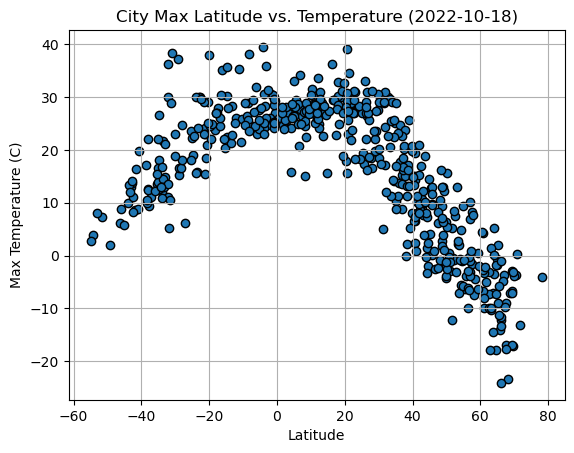

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black",
            marker="o",
            label="cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

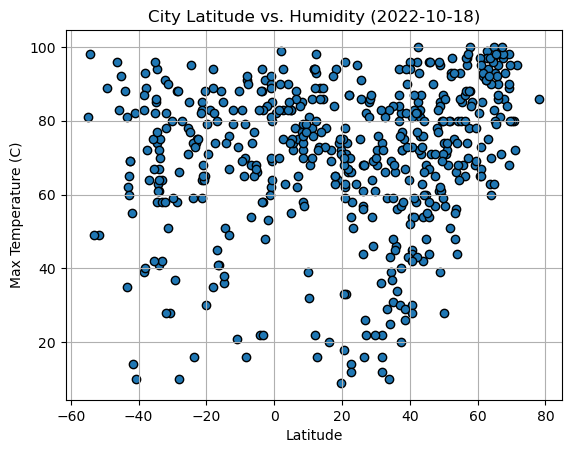

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black",
            marker="o",
            label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

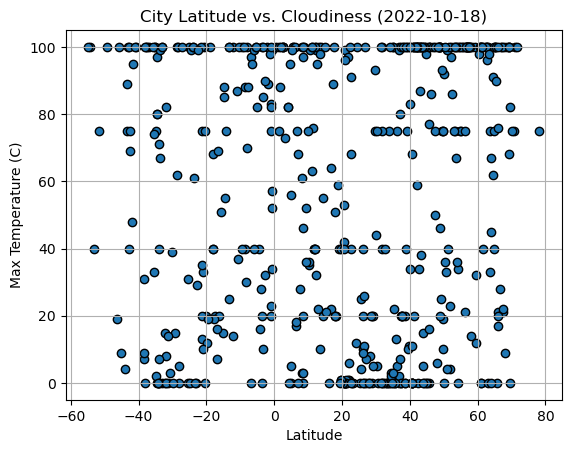

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black",
            marker="o",
            label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

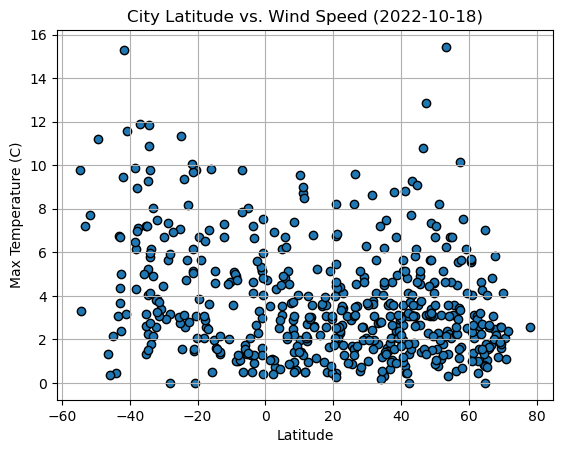

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black",
            marker="o",
            label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# OPTIONAL: Create a function to create Linear Regression plots

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#Check that Weather_DF is right, look above
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,huruta,8.1500,39.3500,14.99,85,61,2.48,ET,1698606027
6,canton,42.3087,-83.4822,9.52,85,100,1.34,US,1698606032
7,patong,12.3364,125.2852,24.94,93,100,2.71,PH,1698606034
8,ilulissat,69.2167,-51.1000,-2.99,68,100,2.57,GL,1698606035
9,laojunmiao,39.8333,97.7333,8.15,29,11,2.89,CN,1698606036


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698606024
1,blackmans bay,-43.0167,147.3167,13.07,62,100,3.65,AU,1698606026
3,touros,-5.1989,-35.4608,27.63,66,82,8.05,BR,1698606028
4,puerto natales,-51.7236,-72.4875,7.25,49,75,7.72,CL,1698606029
5,hithadhoo,-0.6000,73.0833,27.07,80,99,7.54,MV,1698606032


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8827769611703219
y = -0.64x + 36.79


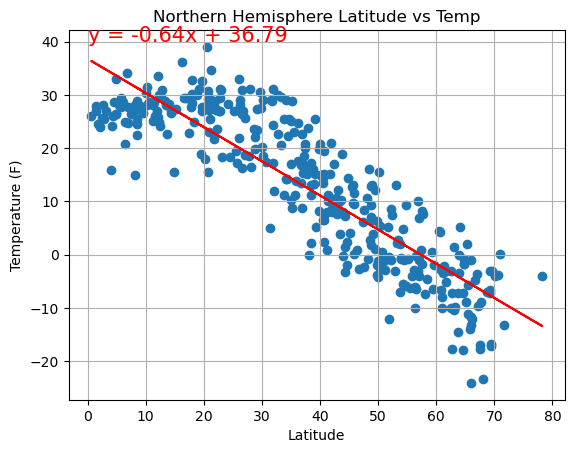

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()

The r-square is 0.7482335740093279
y = 0.43x + 31.27


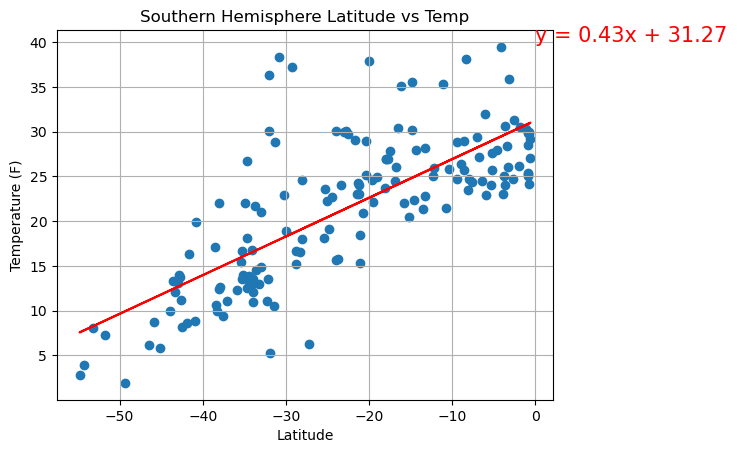

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere plot, the strongly negative r-square value and the flow of the line downward and to the right indicates a strong negative relationship.The highly positive r-square in the Southern Hemisphere indicates a strong relationship between the x and y values. Generally an r-squared value ranges from 0 to 1, with a value closer to 1 representing a stronger linear relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.2043224609969866
y = 0.22x + 62.96


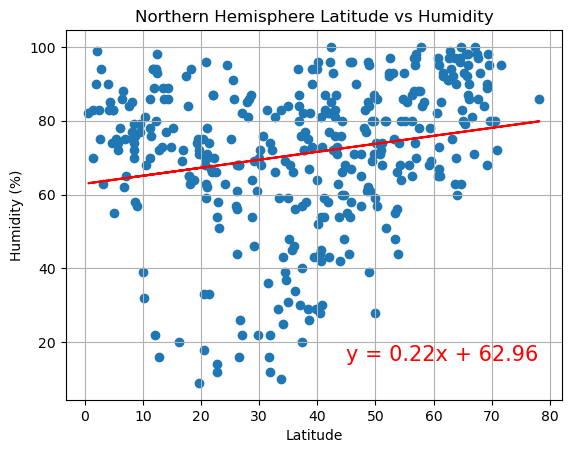

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

The r-square is 0.03790348513571789
y = 0.05x + 69.41


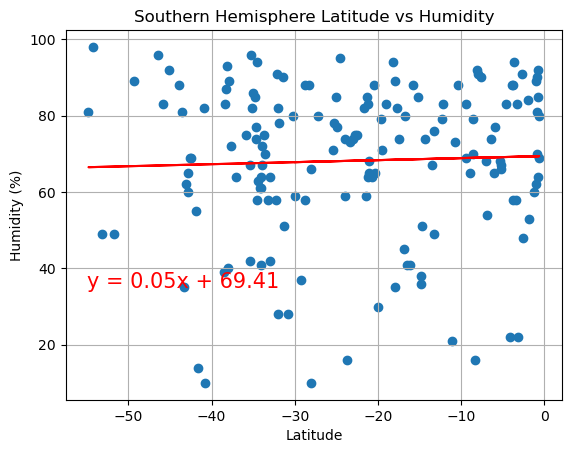

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

**Discussion about the linear relationship:** Though r-value is not always a sole indicator of "the goodness of fit" for x and y variables, it does provide a general guideline to data fit. In this case, the r-value of 0.20 in the Northern Hemisphere indicates a fairly weak correlation. In the Southern Hemisphere, the .03 r-square value and the almost level slope indicate a weak correlation as well.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.19072319106180857
y = 0.41x + 40.04


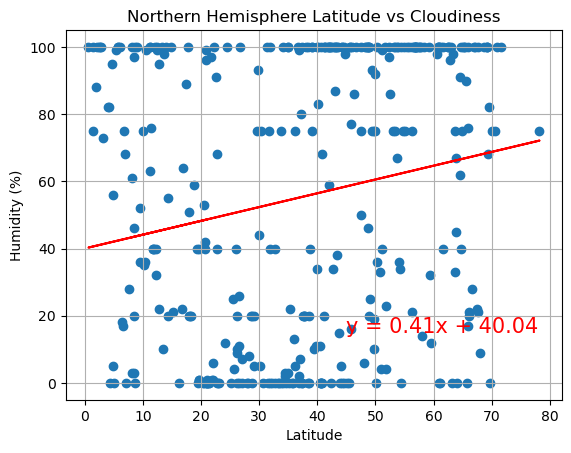

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()


The r-square is 0.047712043217519755
y = 0.13x + 58.75


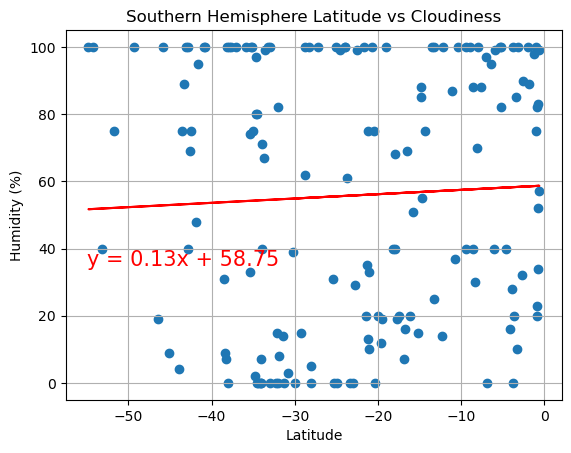

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

**Discussion about the linear relationship:** The upward slope to the right for the Northern Hemisphere linear regression indicates a positive linear correlation, but the r-squared value still shows a fairly weak relationship, as does the diffuse spread of data points. The Southern Hemisphere data, with an r-square value of .04 and a similarly diffuse data spread, also reveals a weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.018763419318064353
y = -0.0x + 3.32


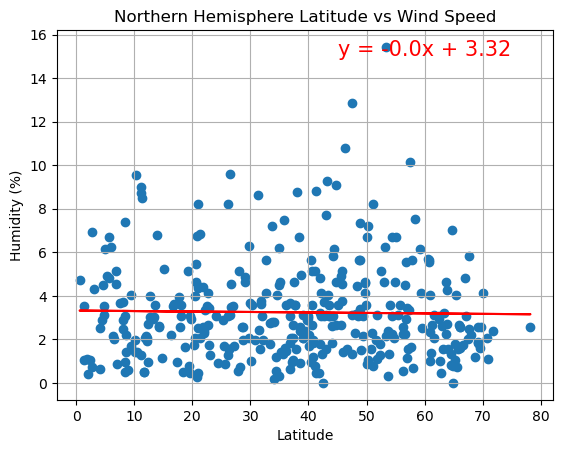

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()


The r-square is -0.29000825866183316
y = -0.06x + 3.28


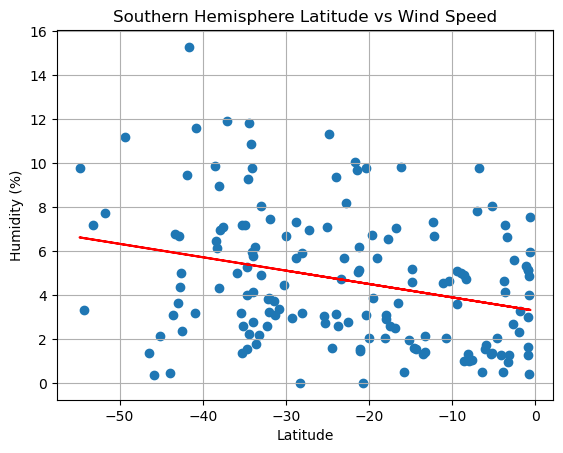

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere analysis, the slope is almost flat and the r-square value is -0.018, indicating a very weak correlation if any. In the Southern Hemisphere, the downward slope to the right shows a negative correlation, while the r-value of -0.29 indicates one of the weaker relationships in this activity.